# ZPD in *Dota 2*: The Power Analysis by Simulation
The following is a full overview of the power analysis for the ZPD *Dota 2* study. Written by lead author, Joseph Hesketh.

In [2]:
%matplotlib widget
%matplotlib inline

%run zpd_power_analysis.py

Our experiment consists of asking participants to play the *Dota 2* Last Hit Trainer three times, watching a random sample of three videos from three groups (amateur, intermediate, and expert), and then playing the Last Hit Trainer three more times.

Our aim is to evaluate whether the difference between the video scores and pre-video scores ($\Delta S_{V-PV}$) and the participant's score improvement ($\Delta S_{Post-Pre}$) follows a polynomial curve that will give a point of maximal improvement.

Our alternative hypothesis is given as:<br>
*H1: Performance improvements will be highest for participants who watch other players whose skill is equal to slightly better than them.*


## Dependent Variable Sampling
Firstly, we want to draw random samples from a distribution and convert them to our dependent variable via the following formula:<br>
$\Delta S_{V-PV} = \bar{S}_{Videos} -\bar{S}_{Pre-Video}$<br>
where $\bar{S}_{Videos}$ is the mean of the video scores given to the participant and $\hat{S}_{Pre-Video}$ is the mean of the pre-video scores of the participants.

We sample the mean of the pre-video scores from a uniform distribution between the range [0,1]. We then place each sample into one of the three groups. Using a truncated distribution with a mean and standard deviation given by the population of videos, we randomly sample three videos to find the mean, and then subtract the pre-video score. This gives us the following distribution:

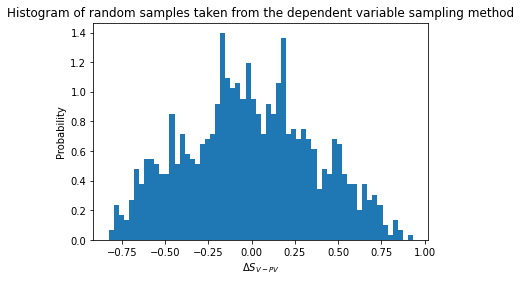

In [4]:
plotDependentVariableSampling(1000)

## Independent Variable Mapping
We then want to map our dependent variables onto the independent variable. This mapping assumes that our alternative hypothesis is correct. However, we also want to add some randomly distributed residuals to our independent variable to simulate the messiness of the data.

Since we are using a polynomial to find a "sweet spot" in the data, this gives us the equation:<br>
$\Delta S_{Post-Pre} = -b_1 (\Delta S_{V-PV} - \Delta S_{ZPD})^2 + b_0 + N(0, \sigma)$<br>
where $b_0$ and $b_1$ are the coeffecients of the polynomial representing the maximal score improvement and the non-standardized effect size respectively, and $\Delta S_{ZPD}$ represents the learner-video score difference zone of proximal development. $N(0,\sigma)$ represents the normally distributed residuals in the data.

Plotting dependent samples onto this function, with non-standardized effect size $b_1 = 0.1$ and residual standard deviation $\sigma = 0.1$, gives us the following:

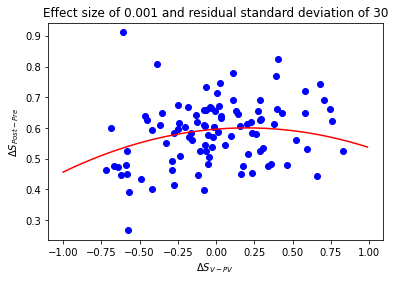

In [11]:
plotIndependentVariableMapping(100)

## Statistical Model and Test
Now we need to test the significance of our sample. We use the ordinary least squares (OLS) to find the coefficients for a polynomial function. Using statsmodels package, we can find the polynomial of best fit and evaluate it's significance.

Doing so gives us the following:

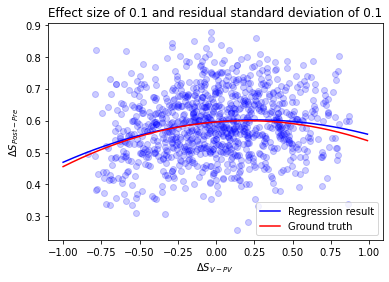

In [16]:
plotStatisticalTest(1000)

## Multiple Tests...
Now we need to do multiple 'experiments' (each test we've done is an experiment so far) to try and figure out the power of our test.

We do this by running multiple experiments and finding the percentage of them that are significant. Let's do this for a sample size of 50 over the course of 1000 experiments. Doing this gives us the following percentage significance:

In [42]:
calculateSignificanceOfSampleSize(sample_size=200, num_of_experiments=200, significance=0.05)


After 200 experiments for sample size 200 and a significance of 0.05, it appears that 100.0% were significant.
This is for an effect size of 0.1 and residual standard deviation of 0.1


## ...Over Multiple Sample Sizes...
The next stage is to start looking at how our percentage of significance, or our power, changes over sample sizes. This is extremely similar to before, but we have to iterate over multiple sample sizes.

This is where things start to become a little more computationally intense. So things start to get a little slower...

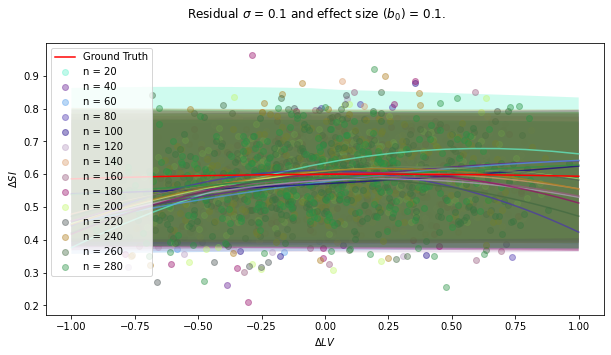

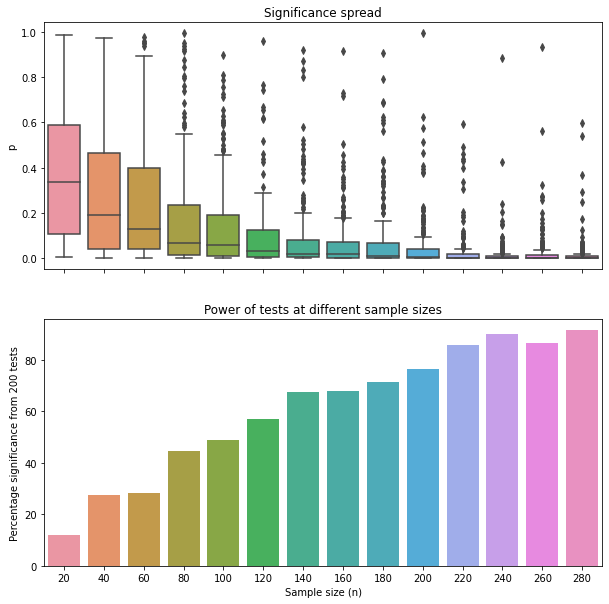

In [41]:
# Uncomment this code to use your own params and generate your own data

# Params is an empty class used to hold important data about the statistical test.
params = Params()
params.model = olsRegression
params.formula = 'y ~ x + I(x**2)'
params.dep_distribution = playerVideoDistributionSample
params.indep_dep_relation = learnerVideoScoreToScoreImprovement
params.sample_size_range = range(20, 300, 20)
params.num_samples = 200
params.value_range = {'min': 0.0, 'max': 1.0}
params.effect_size =  0.1
params.residual_std = 0.1
params.significance = 0.05
params.show_progress_bar = True

sample_data = data=powerAnalysisPolynomialRegression(params)

plotPowerAnalysisData(sample_data, params)

## ..Over Multiple Effect Sizes and Residual Variances
Since we don't have any historical data or infomation on what kind of effect size or residual variance we will encounter, we must analyse the power of our test over multiple effect sizes and residual variance. This means we have to do the same experiment as above *multiple* times. Our analyses will take a lot longer now due to the amount of iterations and experiments we are doing.

The code below loads data from a previous run of tests. However, if you'd like to run your own data then you can change the `generate_data` variable to `True`.

Text(0.5, 114.0, 'Effect Size')

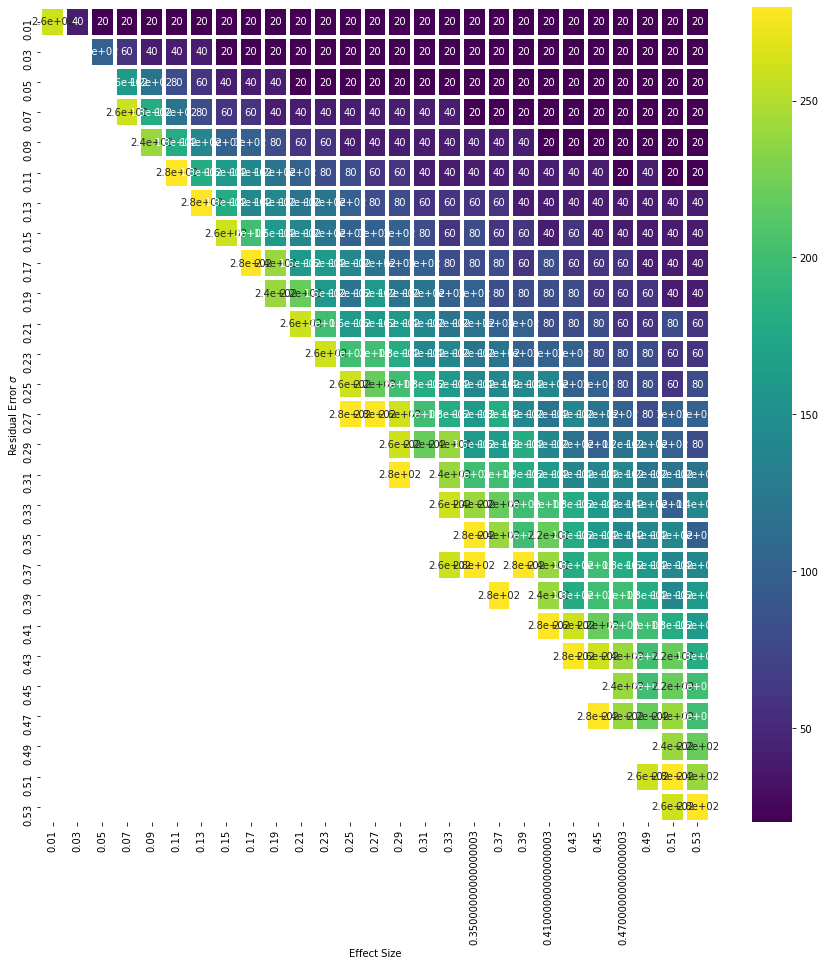

In [5]:
generate_data = False

if generate_data:
    # Params adds extra information for the findLowestSampleSizeMeetingPower function.
    params = Params()
    params.model = olsRegression
    params.formula = 'y ~ x + I(x**2)'
    params.dep_distribution = playerVideoDistributionSample
    params.indep_dep_relation = learnerVideoScoreToScoreImprovement
    params.sample_size_range = range(20, 300, 20)
    params.num_samples = 100
    params.value_range = {'min': 0.0, 'max': 1.0}
    params.effect_size =  0.1
    params.residual_std = 0.1
    params.significance = 0.05
    params.show_progress_bar = True
    params.target_power = 90
    params.effect_size_range = 0.01*np.arange(1, 54, 2)
    params.residual_std_range = 0.01*np.arange(1, 54, 2)
    
    sample_data = findLowestSampleSizeMeetingPower(params)
    sample_data.to_csv('esstddata.csv', index=True)

sample_data = pd.read_csv('esstddata.csv')
sample_data = sample_data.set_index('Unnamed: 0')
sample_data = sample_data.astype(float)
sample_data.head()

fig, ax3 = plt.subplots(figsize = (15,15))
sns.heatmap(sample_data, annot=True, linewidths=4, cmap='viridis')
ax3.set_ylabel('Residual Error $\sigma$')
ax3.set_xlabel('Effect Size')